#### **2-1. Nate 뉴스기사 제목 스크래핑하기**

In [57]:
import requests
import os
from bs4 import BeautifulSoup
from urllib.parse import urljoin
from IPython.display import Image, display

def print_news(section):
    section_dict = {
        '최신' : 'https://news.nate.com/recent?mid=n0100',
        '정치' : 'https://news.nate.com/section?mid=n0200',
        '경제' : 'https://news.nate.com/section?mid=n0300',
        '사회' : 'https://news.nate.com/section?mid=n0400',
        '세계' : 'https://news.nate.com/section?mid=n0500',
        'IT/과학' : 'https://news.nate.com/section?mid=n0600'
    }
    

    print(f'====> {section} 뉴스 <====')

    news_url = section_dict[section]
    
    req_header = {
        'refer': news_url
    }

    res = requests.get(news_url)
    if res.ok:
        soup = BeautifulSoup(res.text, 'html.parser')
        #print(len(soup.select("img[src$='.jpg']")))
        #print(len(soup.select("img[src*='orgImg']")))
        img_url_list = list()
        img_tags = soup.select("img[src*='orgImg']")
        
        for img_tag in img_tags:
            img_url = img_tag['src']

            #http://로 시작하도록 만들기
            if img_url.startswith('//'):
                img_url = 'http:' + img_url
                
            img_url_list.append(img_url)
    
        a_tags = soup.select("div.mlt01 a[href*='com/view'].lt1")
        for idx, a_tag in enumerate(a_tags,1):
            title_tag = a_tag.select_one("h2.tit")
            if a_tag.text:
                title = title_tag.text.strip()
                link = urljoin(news_url, a_tag["href"])
                full_url = a_tag['href']
                if idx <= len(img_url_list):
                    img_url = img_url_list[idx - 1]
                    img_res = requests.get(img_url, headers=req_header)
                    if img_res.ok:
                        display(Image(data=img_res.content))
                print(f'{title} {full_url}')
    else:
        print(f'Error Code = {res.status_code}')
        

====> 최신 뉴스 <====


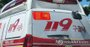

전주 한국농수산대 실습동서 질산 누출…4명 경상 //news.nate.com/view/20250724n40788?mid=n0100


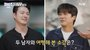

빠니보틀, 차태현vs신승호 여행 비교…"신승호, 배고프면 성질 나 있어" (핸썸즈) //news.nate.com/view/20250724n40786?mid=n0100


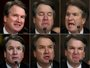

'피해자성'은 어떻게 강자의 무기로 작동하나[책과 삶] //news.nate.com/view/20250724n40785?mid=n0100


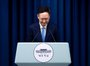

민정수석, '인사검증 부실' 지적에 "앞으로 세밀하게 살필 것" //news.nate.com/view/20250724n40783?mid=n0100


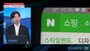

"소비쿠폰 덕분에 '활짝'…하반기 커머스 뜬다" //news.nate.com/view/20250724n40630?mid=n0100


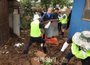

[포토] 강호동 농협회장, "농업인 아픔 함께하겠다" //news.nate.com/view/20250724n40778?mid=n0100


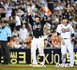

[사진]최재훈, '동점이다' //news.nate.com/view/20250724n40777?mid=n0100


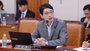

김어준 "강선우, 갑질 없었다" 주장에 주진우 "2차 가해 구조화" //news.nate.com/view/20250724n40776?mid=n0100


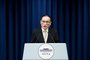

대통령실 "美 거절로 위성락·루비오 면담 불발은 오보…트럼프가 긴급 호출해" //news.nate.com/view/20250724n33875?mid=n0100


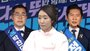

강선우 사퇴에…與 당권주자 '명심 vs 당심' 경쟁 //news.nate.com/view/20250724n40773?mid=n0100


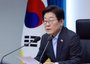

李대통령 "정부 바뀌면 '정책수사' 빈번…악순환 단절해야" //news.nate.com/view/20250724n40772?mid=n0100


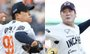

사상 첫 '류김 대전' 초읽기…"韓 최고 좌완, 26일 가리자!" //news.nate.com/view/20250724n40771?mid=n0100


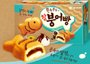

"간식으로 먹었는데"…참붕어빵 자발적 회수 //news.nate.com/view/20250724n39151?mid=n0100


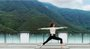

"화려함보다 건강함"⋯럭셔리 호텔 트렌드 //news.nate.com/view/20250724n40769?mid=n0100


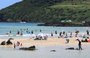

"제주도 살면 행복할 줄 알았는데"···인구 '우르르' 빠져나간 이유가 //news.nate.com/view/20250724n40768?mid=n0100


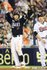

'적시타' 최재훈 '승부는 또 다시 원점이다' [MK포토] //news.nate.com/view/20250724n40767?mid=n0100


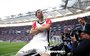

'벌써 5천억원 썼다' 리버풀, 아직 한 발 남았다 [PL 와치] //news.nate.com/view/20250724n40766?mid=n0100


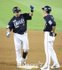

[포토] 노시환 '분위기 넘어왔어' //news.nate.com/view/20250724n40764?mid=n0100


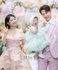

'이지훈♥' 아야네, 딸 첫돌 맞아 기부 "물질 보다 가치관 선물" //news.nate.com/view/20250724n40763?mid=n0100


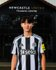

'최연소 기록 제조기' 박승수, 뉴캐슬 입단 확정…한국인 20호 EPL 선수 //news.nate.com/view/20250724n40762?mid=n0100


In [58]:
print_news('최신')